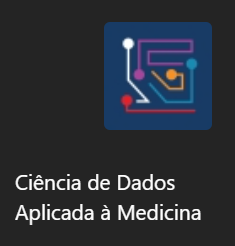

# 🖥️ Processamento de Dados: Vantagens da utilização de Linguagens de Programação

___

Autor: Nuno S. Osório
(email: nosorio@med.uminho.pt; linkedin: https://www.linkedin.com/in/nunososorio/)

Data: 21 e 22 de maio 2024

Versão Interativa: https://tinyurl.com/cienciadados2
___

# Redução de dimensionalidade



In [6]:
from IPython.display import display, HTML

# Define the iframe code
iframe_code = """
<div class="sketchfab-embed-wrapper">
    <iframe title="T" frameborder="0" allowfullscreen mozallowfullscreen="true" webkitallowfullscreen="true" allow="autoplay; fullscreen; xr-spatial-tracking" xr-spatial-tracking execution-while-out-of-viewport execution-while-not-rendered web-share src="https://sketchfab.com/models/18b6147712854200bdbc5c5424e3c0dd/embed?ui_infos=0">
    </iframe>
</div>
"""
# Display the iframe
display(HTML(iframe_code))

# Visualization by Loïc Norgeot


In [8]:
!wget -q https://raw.githubusercontent.com/nunososorio/medicaldatascience/main/les-arbres.xlsx

In [24]:
import pandas as pd
df = pd.read_excel("les-arbres.xlsx")
df

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,202333,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE SAINT HUBERT,202014,Sophora,Styphnolobium,japonicum,NaN,80,8,Adulte,NON,"48.827213058685736, 2.4526493999585823"
1,262615,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,BOULEVARD DE MONTMORENCY,202013,Sophora,Styphnolobium,japonicum,NaN,126,12,Adulte,NON,"48.855290250253894, 2.2639776886541667"
2,266962,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,BOULEVARD DE REIMS,103020,Platane,Platanus,x hispanica,NaN,206,20,Mature,NON,"48.89053027449785, 2.299673472188525"
3,286937,Arbre,Alignement,PARIS 20E ARRDT,142-144,NaN,RUE DES PYRENEES,1802004,Sophora,Styphnolobium,japonicum,NaN,55,8,Jeune (arbre)Adulte,NON,"48.8595245091764, 2.401780969021116"
4,148479,Arbre,CIMETIERE,PARIS 17E ARRDT,NaN,NaN,CIMETIERE DES BATIGNOLLES / AVENUE LATERALE / ...,A12600031006,Noisetier de Byzance,Corylus,colurna,NaN,20,5,NaN,NON,"48.89890809754974, 2.3192180573848784"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210157,194762,Arbre,PERIPHERIQUE,PARIS 14E ARRDT,NaN,NaN,TALUS N°05-01,90501001,Peuplier,Populus,nigra,''Italica'',140,15,NaN,NON,"48.82036902403632, 2.3251375106938075"
210158,104154,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT / 7 RUE BOTZARIS,O09402007,Noyer,Juglans,nigra,NaN,300,25,Mature,NON,"48.87792251378056, 2.3795524719125503"
210159,220092,Arbre,Alignement,PARIS 12E ARRDT,62,NaN,BOULEVARD DE BERCY,802021,Platane,Platanus,x hispanica,NaN,130,10,Adulte,NON,"48.83887003065285, 2.38806770694977"
210160,233692,Arbre,Alignement,PARIS 13E ARRDT,17,NaN,RUE NEUVE TOLBIAC,301008,Sophora,Styphnolobium,japonicum,NaN,60,5,Jeune (arbre)Adulte,NON,"48.83124569686037, 2.378112070887491"


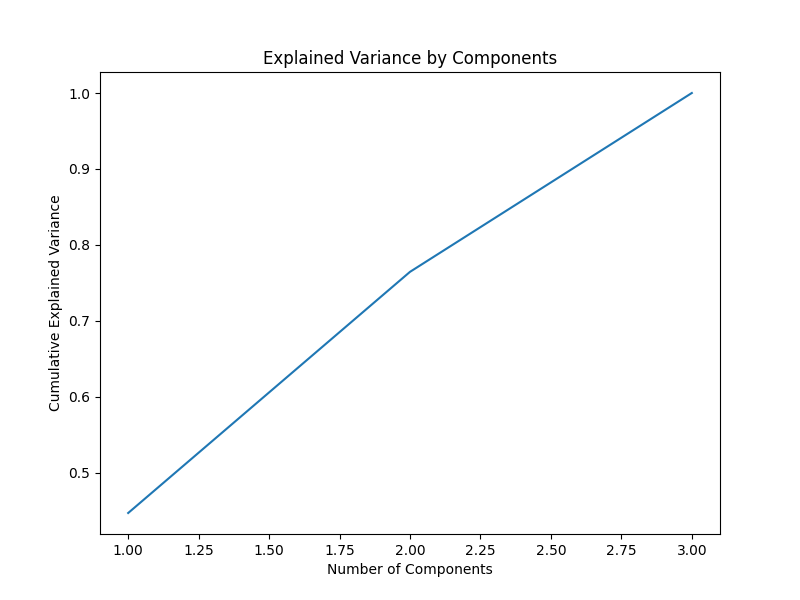

In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Encode the 'ESPECE' column to numerical values
df['ESPECE'] = df['ESPECE'].astype('category').cat.codes
df['STADE DE DEVELOPPEMENT'] = df['STADE DE DEVELOPPEMENT'].astype('category').cat.codes

# Standardize the features to have mean=0 and variance=1 (z-score)
features = ['ESPECE', 'STADE DE DEVELOPPEMENT', 'HAUTEUR (m)']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

# Plot the explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(features)+1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



In [30]:
df_pca

,principal component
0,-0.555304
1,-0.099233
2,3.146418
3,0.388748
4,-1.704543
...,...
210157,0.000862
210158,3.029140
210159,0.590166
210160,0.046695


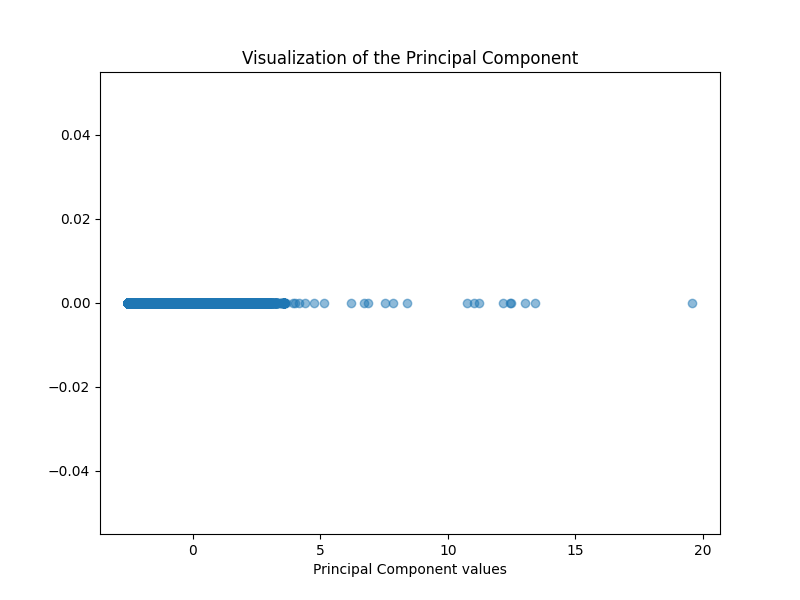

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component'], [0]*len(df_pca), alpha=0.5)
plt.title('Visualization of the Principal Component')
plt.xlabel('Principal Component values')
plt.show()



© Nuno S. Osório, 2024
